In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random

In [22]:
X, _ = make_blobs(1000, centers=7, random_state=42)

In [23]:
class KMeans:
    
    def __init__(self, n_clusters, max_iter=10):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, X):
        jobs = []
        for i in range(10):
            center_points = random.choices(X, k=self.n_clusters)
            clusters = []
            for point in center_points:
                cluster = Cluster(point)
                clusters.append(cluster)

            for i in range(self.max_iter):
                labels_ = []
                for point in X:
                    distances = []
                    for cluster in clusters:
                        dis = cluster.distance(point)
                        distances.append((dis, cluster))

                    distances_np = np.array(distances)
                    min_index = np.argmin(distances_np[:, 0])

                    selected = clusters[min_index]
                    selected.points.append(point)
                    labels_.append(min_index)

                for cluster in clusters:
                    cluster.update_center()
        
            current_error = self.error(clusters, X, labels_)
            jobs.append((current_error, clusters, labels_))
        jobs = np.array(jobs)
        min_index = np.argmin(jobs[:, 0])
        best_job = jobs[min_index]
        self.clusters = best_job[1]
        self.labels_ = best_job[2]
        
    def error(self, clusters, X, labels_):
        total = 0
        for point, index in zip(X, labels_):
            total += clusters[index].distance(point)
        return total
            
        
class Cluster:
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def update_center(self):
        self.center = np.mean(self.points, axis=0)
        self.points = []
    
    def distance(self, point):
        return np.sum((self.center - point) ** 2)

In [30]:
model = KMeans(2)

In [31]:
model.fit(X)

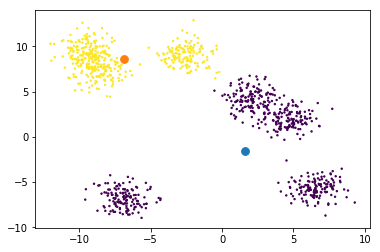

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, s = 2)
for cluster in model.clusters:
    plt.scatter(cluster.center[0], cluster.center[1] , s= 60)

In [33]:
X.shape

(1000, 2)